In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xgboost as xgb

In [75]:
test = pd.read_csv("data/test_with_dist_without_dubs.csv.gz")
test = test[['merchant_id', 'latitude','longitude','real_transaction_dttm', 'record_delay','dist','is_in_area']]
test.head()

,merchant_id,latitude,longitude,real_transaction_dttm,record_delay,dist,is_in_area
0,1150899,46.498337,13.507997,39293.0,0.0,2517926.0,0
1,411612,56.117978,47.475212,42592.0,0.0,45041.0,1
2,616963,31.781375,2.905627,67258.0,0.0,4353273.0,0
3,419934,60.000674,30.264237,75541.0,0.0,17709.0,1
4,407995,55.708998,37.620635,73061.0,0.0,6397.0,1


In [76]:
train = pd.read_csv("data/train_without_dubs.csv.gz")
train['dist'] = train['dist']
train.head()

,merchant_id,latitude,longitude,real_transaction_dttm,record_delay,latitude_origin,longitude_origin,dist,is_in_area
0,228992,55.672829,37.484667,39956.0,2.0,55.672829,37.484667,0.0,1
1,206828,59.984818,30.344084,81656.0,5.0,59.984818,30.344084,0.0,1
2,246118,54.994987,82.965875,73778.0,7.0,54.994987,82.965875,0.0,1
3,41902,59.956250,30.244389,64044.0,8.0,59.956250,30.244389,0.0,1
4,679552,55.823292,37.497800,76750.0,9.0,55.823292,37.497800,0.0,1


In [77]:
X_1 = train.drop(['longitude_origin', 'latitude_origin'], axis = 1)
Y_1 = train['longitude_origin']

In [78]:
X_1.columns

Index(['merchant_id', 'latitude', 'longitude', 'real_transaction_dttm',
       'record_delay', 'dist', 'is_in_area'],
      dtype='object')

In [79]:
X_2 = train.drop(['latitude_origin'], axis = 1)
Y_2 = train['latitude_origin']

In [80]:
clf_1 = xgb.XGBRegressor(n_estimators=300, learning_rate=0.2)
clf_2 = xgb.XGBRegressor(n_estimators=300, learning_rate=0.2)

In [81]:
%time clf_1.fit(X_1, Y_1)

CPU times: user 15.3 s, sys: 410 ms, total: 15.7 s
Wall time: 5.99 s


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [82]:
for f, imp in zip(X_1.columns, clf_1.feature_importances_):
    print(f, imp)

merchant_id 0.0954479
latitude 0.203133
longitude 0.292707
real_transaction_dttm 0.0347528
record_delay 0.0186001
dist 0.352423
is_in_area 0.00293686


In [83]:
pred_long = clf_1.predict(test)
pred_long

array([ 40.20256805,  47.8777504 ,  35.44664001, ...,  61.49795151,
        30.47027206,  39.04535294], dtype=float32)

In [85]:
def draw_coordinates(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(data['longitude_origin'], data['latitude_origin'])
    ax.add_patch(plt.Rectangle((20.463191, 40.143636), 142.730432 - 20.463191, 68.970401 - 40.143636, fill=False,hatch='\\'))
    plt.show()

In [86]:
test['longitude_origin'] = pred_long
test.head()

,merchant_id,latitude,longitude,real_transaction_dttm,record_delay,dist,is_in_area,longitude_origin
0,1150899,46.498337,13.507997,39293.0,0.0,2517926.0,0,40.202568
1,411612,56.117978,47.475212,42592.0,0.0,45041.0,1,47.877750
2,616963,31.781375,2.905627,67258.0,0.0,4353273.0,0,35.446640
3,419934,60.000674,30.264237,75541.0,0.0,17709.0,1,30.491623
4,407995,55.708998,37.620635,73061.0,0.0,6397.0,1,37.552544


In [87]:
%time clf_2.fit(X_2, Y_2)

CPU times: user 16.7 s, sys: 432 ms, total: 17.1 s
Wall time: 6.6 s


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.2, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [88]:
pred_lat = clf_2.predict(test[['merchant_id', 'latitude', 'longitude', 'real_transaction_dttm', 'record_delay', 'longitude_origin', 'dist', 'is_in_area']])
pred_lat

array([ 47.12361526,  55.74832153,  54.03660965, ...,  55.11782074,
        59.86868286,  46.02645874], dtype=float32)

In [91]:
test['latitude_origin'] = pred_lat
test.head()

,merchant_id,latitude,longitude,real_transaction_dttm,record_delay,dist,is_in_area,longitude_origin,latitude_origin
0,1150899,46.498337,13.507997,39293.0,0.0,2517926.0,0,40.202568,47.123615
1,411612,56.117978,47.475212,42592.0,0.0,45041.0,1,47.877750,55.748322
2,616963,31.781375,2.905627,67258.0,0.0,4353273.0,0,35.446640,54.036610
3,419934,60.000674,30.264237,75541.0,0.0,17709.0,1,30.491623,59.912495
4,407995,55.708998,37.620635,73061.0,0.0,6397.0,1,37.552544,55.744450


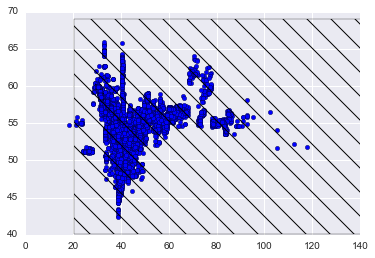

In [92]:
draw_coordinates(test)

In [102]:
test.to_csv('data/test_with_predicted_lat_lon.csv.gz', compression='gzip', index=False)